# Project One: Multiple Regression, Qualitative Variables Interactions, Quadratic Regression

For Project One, you have been asked to create different regression models analyzing a housing data set. Before beginning work on the project, be sure to read through the Project One Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project One Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.


### Scenario

You are a data analyst working for a real estate company. You have access to a large set of historical data that you can use to analyze relationships between different attributes of a house (such as square footage or the number of bathrooms) and the house’s selling price. You have been asked to create different regression models to predict sale prices for houses based on critical variable factors. These regression models will help your company set better prices when listing a home for a client. Setting better prices will ensure that listings can be sold within a reasonable amount of time.

There are several variables in this data set, but you will be working with the following important variables: 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> price </div> | <div style="text-align: left"> Sale price of the home </div> |
| <div style="text-align: left"> bedrooms </div> | <div style="text-align: left"> Number of bedrooms </div> |
| <div style="text-align: left"> bathrooms </div> | <div style="text-align: left"> Number of bathrooms </div> |
| <div style="text-align: left"> sqft_living </div> | <div style="text-align: left"> Size of the living area in sqft </div> |
| <div style="text-align: left"> sqft_above </div> | <div style="text-align: left"> Size of the upper level in sqft </div> |
| <div style="text-align: left"> sqft_lot </div> | <div style="text-align: left"> Size of the lot in sqft </div> |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> Age of the home </div> |
| <div style="text-align: left"> grade </div> | <div style="text-align: left"> Measure of craftsmanship and the quality of materials used to build the home </div> |
| <div style="text-align: left"> appliance_age </div> | <div style="text-align: left"> Average age of all appliances in the home </div> |
| <div style="text-align: left"> crime </div> | <div style="text-align: left"> Crime rate per 100,000 people </div> |
| <div style="text-align: left"> backyard </div> | <div style="text-align: left"> Home has a backyard (backyard=1) or not (backyard=0) </div> |
| <div style="text-align: left"> school_rating </div> | <div style="text-align: left"> Average rating of schools in the area </div> |
| <div style="text-align: left"> view </div> | <div style="text-align: left"> Home backs out to a lake (view=2), backs out to trees (view=1), or backs out to a road (view=0) </div> |

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Prepare Your Data Set

In the following code block, you have been given the R code to prepare your data set.

Click the **Run** button on the toolbar to run this code.

In [1]:
housing <- read.csv(file="housing_v2.csv", header=TRUE, sep=",")

# converting appropriate variables to factors  
housing <- within(housing, {
   view <- factor(view)
   backyard <- factor(backyard)
})

# number of columns
ncol(housing)

# number of rows
nrow(housing)

[1] 23

[1] 2692

# Model #1 - First Order Regression Model with Quantitative and Qualitative Variables

You have been asked to create a first order regression model for *price* as the response variable, and *sqft_living*, *sqft_above*, *age*, *bathrooms*, and *view* as predictor variables. Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your first order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [1]:
# Loading housing_v2 data set from a housing_v2.csv file
housing_v2 <- read.csv(file='housing_v2.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
housing_v2 <- within(housing_v2, {
   backyard <- factor(backyard)
   view <- factor(view)
})

# Variables and their type
print("Variables")
sapply(housing_v2, class)


# Print the data set
print("dataset")
housing_v2


# Print the first 10 rows
print("head")
head(housing_v2, 10)

[1] "Variables"


id         price      bedrooms     bathrooms   sqft_living 
    "integer"     "integer"     "integer"     "numeric"     "integer" 
     sqft_lot        floors      backyard          view     condition 
    "integer"     "numeric"      "factor"      "factor"     "integer" 
        grade    sqft_above sqft_basement      yr_built  yr_renovated 
    "integer"     "integer"     "integer"     "integer"     "integer" 
    renovated       zipcode sqft_living15    sqft_lot15           age 
    "integer"     "integer"     "integer"     "integer"     "integer" 
appliance_age         crime school_rating 
    "numeric"     "integer"     "numeric"

[1] "dataset"


id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,backyard,view,condition,⋯,yr_built,yr_renovated,renovated,zipcode,sqft_living15,sqft_lot15,age,appliance_age,crime,school_rating
<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,325000,3,2.25,1570,43350,1.0,0,2,4,⋯,1967,0,0,98022,1570,220849,48,17.7,138,5.27
2,745000,5,3.00,2400,10126,2.0,0,2,3,⋯,1981,0,0,98126,2250,3946,34,3.2,101,9.14
3,571000,4,1.00,1350,4000,1.5,0,0,3,⋯,1930,0,0,98117,1520,4000,85,7.6,110,7.97
4,395000,2,2.00,1960,4018,1.0,0,0,5,⋯,1950,0,0,98108,1240,4641,65,13.0,118,6.52
5,449950,3,1.75,1470,7590,1.0,0,0,3,⋯,1988,0,0,98117,1700,5080,27,6.8,98,8.18
6,243000,3,1.75,1450,12125,1.0,0,0,4,⋯,1981,0,0,98001,1210,12125,34,14.1,209,6.23
7,219950,3,1.50,1070,6601,1.0,0,0,3,⋯,1985,0,0,98002,1030,6614,30,14.4,171,6.15
8,799000,5,2.75,2500,19783,1.0,1,2,4,⋯,1959,0,0,98005,1700,15375,56,5.1,96,8.64
9,207000,4,2.00,1690,7728,1.5,0,0,4,⋯,1967,0,0,98198,1480,8009,48,22.5,188,3.98


[1] "head"


id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,backyard,view,condition,⋯,yr_built,yr_renovated,renovated,zipcode,sqft_living15,sqft_lot15,age,appliance_age,crime,school_rating
<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,325000,3,2.25,1570,43350,1.0,0,2,4,⋯,1967,0,0,98022,1570,220849,48,17.7,138,5.27
2,745000,5,3.00,2400,10126,2.0,0,2,3,⋯,1981,0,0,98126,2250,3946,34,3.2,101,9.14
3,571000,4,1.00,1350,4000,1.5,0,0,3,⋯,1930,0,0,98117,1520,4000,85,7.6,110,7.97
4,395000,2,2.00,1960,4018,1.0,0,0,5,⋯,1950,0,0,98108,1240,4641,65,13.0,118,6.52
5,449950,3,1.75,1470,7590,1.0,0,0,3,⋯,1988,0,0,98117,1700,5080,27,6.8,98,8.18
6,243000,3,1.75,1450,12125,1.0,0,0,4,⋯,1981,0,0,98001,1210,12125,34,14.1,209,6.23
7,219950,3,1.50,1070,6601,1.0,0,0,3,⋯,1985,0,0,98002,1030,6614,30,14.4,171,6.15
8,799000,5,2.75,2500,19783,1.0,1,2,4,⋯,1959,0,0,98005,1700,15375,56,5.1,96,8.64
9,207000,4,2.00,1690,7728,1.5,0,0,4,⋯,1967,0,0,98198,1480,8009,48,22.5,188,3.98


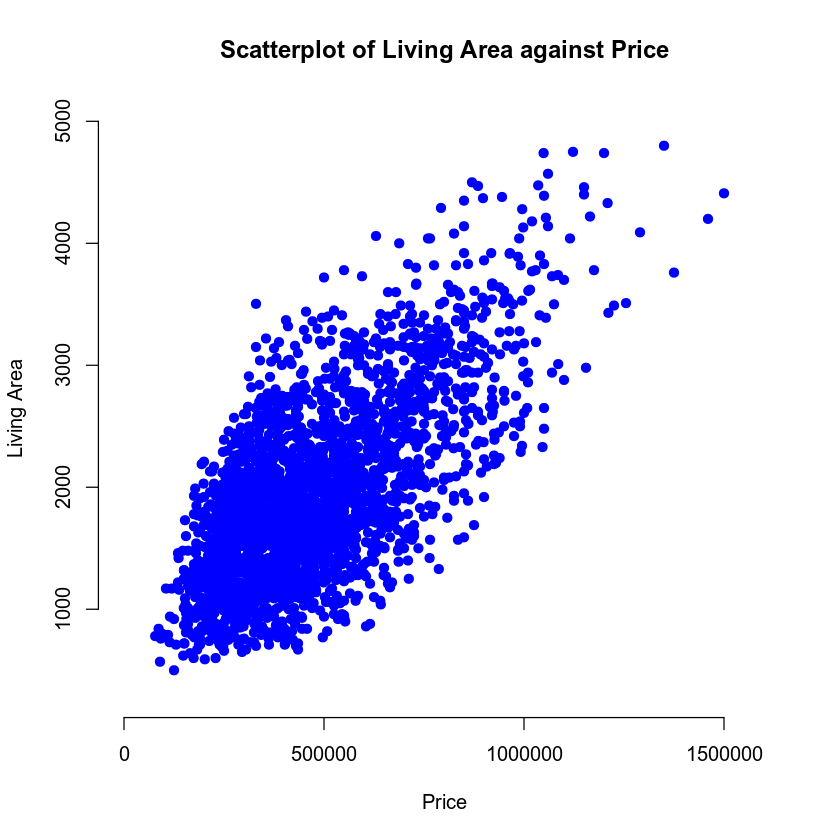

In [2]:
plot(housing_v2$price, housing_v2$sqft_living, 
     main = "Scatterplot of Living Area against Price",
     xlab = "Price", ylab = "Living Area",
     xlim=c(0, 1600000),
     ylim=c(300, 5000),
     col="blue", 
     pch = 19, frame = FALSE)

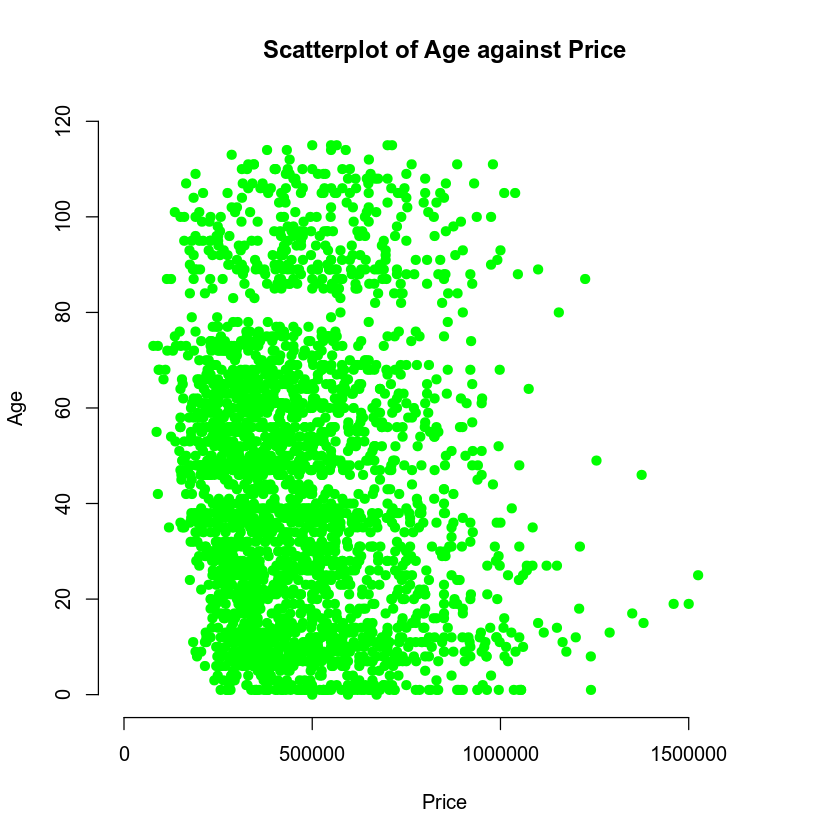

In [3]:
plot(housing_v2$price, housing_v2$age, 
     main = "Scatterplot of Age against Price",
     xlab = "Price", ylab = "Age",
     xlim=c(0, 1700000),
     ylim=c(0, 120),
     col="green", 
     pch = 19, frame = FALSE)

In [4]:
# Selecting price, sqft_living to subset the data
myvars <- c("price","sqft_living")
housing_v2_subset <- housing_v2[myvars]

# Print the first 10 rows
print("head")
head(housing_v2_subset, 10)

# Print the correlation matrix
print("cor")
corr_matrix <- cor(housing_v2_subset, method = "pearson")
round(corr_matrix, 4)

[1] "head"


price,sqft_living
<int>,<int>
325000,1570
745000,2400
571000,1350
395000,1960
449950,1470
243000,1450
219950,1070
799000,2500
207000,1690


[1] "cor"


,price,sqft_living
price,1.0000,0.6895
sqft_living,0.6895,1.0000


In [5]:
# Selecting price, age to subset the data
myvars <- c("price","age")
housing_v2_subset <- housing_v2[myvars]

# Print the first 10 rows
print("head")
head(housing_v2_subset, 10)

# Print the correlation matrix
print("cor")
corr_matrix <- cor(housing_v2_subset, method = "pearson")
round(corr_matrix, 4)

[1] "head"


price,age
<int>,<int>
325000,48
745000,34
571000,85
395000,65
449950,27
243000,34
219950,30
799000,56
207000,48


[1] "cor"


,price,age
price,1.0000,-0.0746
age,-0.0746,1.0000


In [6]:
# Create the multiple regression model and print the statistics
model1 <- lm(price ~ sqft_living + sqft_above + age + bathrooms + view, data=housing_v2)
summary(model1)


Call:
lm(formula = price ~ sqft_living + sqft_above + age + bathrooms + 
    view, data = housing_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-419299 -101792   -5606   93896  489323 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.709e+03  1.411e+04   0.546  0.58495    
sqft_living 1.293e+02  8.123e+00  15.916  < 2e-16 ***
sqft_above  1.951e+01  7.458e+00   2.616  0.00894 ** 
age         1.451e+03  1.199e+02  12.098  < 2e-16 ***
bathrooms   4.397e+04  6.126e+03   7.178 9.13e-13 ***
view1       1.675e+05  1.071e+04  15.640  < 2e-16 ***
view2       2.490e+05  1.201e+04  20.739  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 133600 on 2685 degrees of freedom
Multiple R-squared:  0.6029,	Adjusted R-squared:  0.602 
F-statistic: 679.3 on 6 and 2685 DF,  p-value: < 2.2e-16


In [7]:
fitted_values <- fitted.values(model1) 
fitted_values

1         2         3         4         5         6         7         8 
 658920.0  795090.2  375857.1  462459.0  342554.5  349732.9  276395.1  830890.8 
        9        10        11        12        13        14        15        16 
 416745.2  656704.5  477093.1  338704.7  484825.9  436818.1  410014.2  635913.2 
       17        18        19        20        21        22        23        24 
 795286.2  988418.7  309570.9  366549.3  321071.5  560525.5  412152.8  263219.8 
       25        26        27        28        29        30        31        32 
 669366.8  385145.8  335255.6  393496.3  654379.4  355774.2  374878.9  358350.0 
       33        34        35        36        37        38        39        40 
 386340.5  440016.0  447066.5  470259.9  408647.9  253882.6  531307.3  385227.5 
       41        42        43        44        45        46        47        48 
 864583.6  576746.7  273609.4  575591.9  512776.0  860902.8  492296.4  579358.5 
       49        50        51        52        53        54        55        56 
 344432.5  445927.8  489439.2  375606.8  346649.8  489884.0  476468.7  354220.1 
       57        58        59        60        61        62        63        64 
 500089.6  478455.3  571458.3  407856.2  448965.3  378243.0  510866.9  618406.8 
       65        66        67        68        69        70        71        72 
 282414.0  430810.9  471438.0  398590.8  787162.2  435947.1  349233.3  828754.0 
       73        74        75        76        77        78        79        80 
 584482.3  504193.1  528867.3  448207.0  404878.9  329358.3  532832.4  650708.6 
       81        82        83        84        85        86        87        88 
 413403.5  295910.7  332450.6  497582.7  845710.0  386272.8  416556.8  406952.9 
       89        90        91        92        93        94        95        96 
 468258.9  306968.4  500745.4  800064.0  250425.7  476751.2  276244.0  884792.1 
       97        98        99       100       101       102       103       104 
 490869.0  645055.6  486500.7  877841.5  552674.8  328877.1  364450.1  346034.2 
      105       106       107       108       109       110       111       112 
 360450.1  657996.3  535593.0  507763.3  387884.0  367582.4  502039.7  279550.1 
      113       114       115       116       117       118       119       120 
 312631.0  380511.1  470812.4  693684.3  336094.0  495055.0  316084.2  313268.6 
      121       122       123       124       125       126       127       128 
 605351.2  292462.3  337879.6  495541.5  344086.9  378924.5  399443.9  514712.1 
      129       130       131       132       133       134       135       136 
 602176.5  981012.5  299267.1  443887.3  989121.7  169004.4  338214.8  763378.1 
      137       138       139       140       141       142       143       144 
 419055.3  377983.4  650432.4  464216.8  410642.3  431796.8  399185.0  350498.1 
      145       146       147       148       149       150       151       152 
 350226.7  508029.6  363624.9  391246.5  505769.5  562851.7  447791.0  268574.1 
      153       154       155       156       157       158       159       160 
 672792.7  367818.9  406620.5  348969.4  398487.5  369654.9  396774.5  532366.2 
      161       162       163       164       165       166       167       168 
 412632.3  476250.8  478134.1  639126.3  365913.8  352721.9  633473.2  329628.9 
      169       170       171       172       173       174       175       176 
 400373.9  407289.9  445653.3  644820.1  786795.6  925622.1  388405.2  433637.5 
      177       178       179       180       181       182       183       184 
 407893.6  401968.2  309871.4  330478.8  419019.3  504992.2  372026.3  483050.6 
      185       186       187       188       189       190       191       192 
 449547.5  586898.0  542333.7  390357.9  630956.5  308558.7  335278.9  252249.8 
      193       194       195       196       197       198       199       200 
 283198.3  429733.8  424480.4  868519.8

In [9]:
residuals <- residuals(model1)
residuals

1            2            3            4            5            6 
-333919.9675  -50090.1510  195142.9424  -67458.9885  107395.5088 -106732.8738 
           7            8            9           10           11           12 
 -56445.1487  -31890.8485 -209745.2328   93295.4789 -127093.0707  -66704.7072 
          13           14           15           16           17           18 
 -99875.9408 -164818.0517 -132014.2453  -95913.2090  -40286.1683  -70418.6760 
          19           20           21           22           23           24 
 101429.1359  -91549.2524  133928.5056 -221525.4834   32847.2323   22730.1980 
          25           26           27           28           29           30 
 120633.1795  -75145.7911  194694.3877  -54496.3039  135620.5757  239225.7592 
          31           32           33           34           35           36 
-158878.9047  -83399.9932  128659.5297  109984.0055  -77066.5278  -60259.8766 
          37           38           39           40           41           42 
 106352.0989  411067.3924  148692.7493   98717.4510  -19583.6213  -46746.7362 
          43           44           45           46           47           48 
  56290.6052   84358.1014 -167775.9557 -210902.8422  -77297.4350 -261358.5041 
          49           50           51           52           53           54 
-100432.4732 -198427.7977  170560.7596 -115606.7848 -114149.7696 -219884.0180 
          55           56           57           58           59           60 
 -86468.6573  -89270.0820 -105089.5881  129544.7268  163541.6780 -127856.1708 
          61           62           63           64           65           66 
 -68965.3443   88856.9500  107133.1234    6593.2222  122086.0333  -50310.9461 
          67           68           69           70           71           72 
 -96437.9533  151409.1655   22837.8149  -55947.1456   15766.7306  134246.0232 
          73           74           75           76           77           78 
-174482.3478  128556.9260 -156867.3365  241792.9973  -21998.8506  285641.6901 
          79           80           81           82           83           84 
  74667.5958  -50708.6229  116596.4522  -21110.6625  -32450.6120 -102582.6895 
          85           86           87           88           89           90 
 -15710.0405   13727.1768   85443.2318  135047.0745 -113258.8788  -69968.4311 
          91           92           93           94           95           96 
-190745.3726 -250063.9832   -1925.7033  176248.8418   68705.9658  -54792.0787 
          97           98           99          100          101          102 
 -90869.0224  -45055.5761  242499.3426   42158.4927 -202674.8008  -39377.0789 
         103          104          105          106          107          108 
  50549.9474 -116034.2043 -213450.1393  202003.6826  194407.0164  -72763.2654 
         109          110          111          112          113          114 
  87315.9831  -56582.4385   37960.3439   45449.9163  -23840.9598  -76511.1362 
         115          116          117          118          119          120 
 206687.6215   26315.7245  213905.9514  254945.0435  -34084.2173   81731.3773 
         121          122          123          124          125          126 
 -15401.2291   12537.7341 -142879.5780   54458.4742 -136986.8606  122075.5068 
         127          128          129          130          131          132 
-163576.8510 -185712.1222  -67176.4790 -127212.5100  -87267.1485  -54887.3292 
         133          134          135          136          137          138 
 -24121.6843  155995.5719  240885.2009 -227378.1386   80944.6555  132016.5968 
         139          140          141          142          143          144 
 -20432.3912  -74216.7950 -182692.2521  108203.1530  -58685.0054 -119498.1039 
         145          146          147          148          149          150 
  87773.2812  121970.4318  -88624.9235  -20246.5364  -90769.5221   74148.3345 
         151          152          153          154          

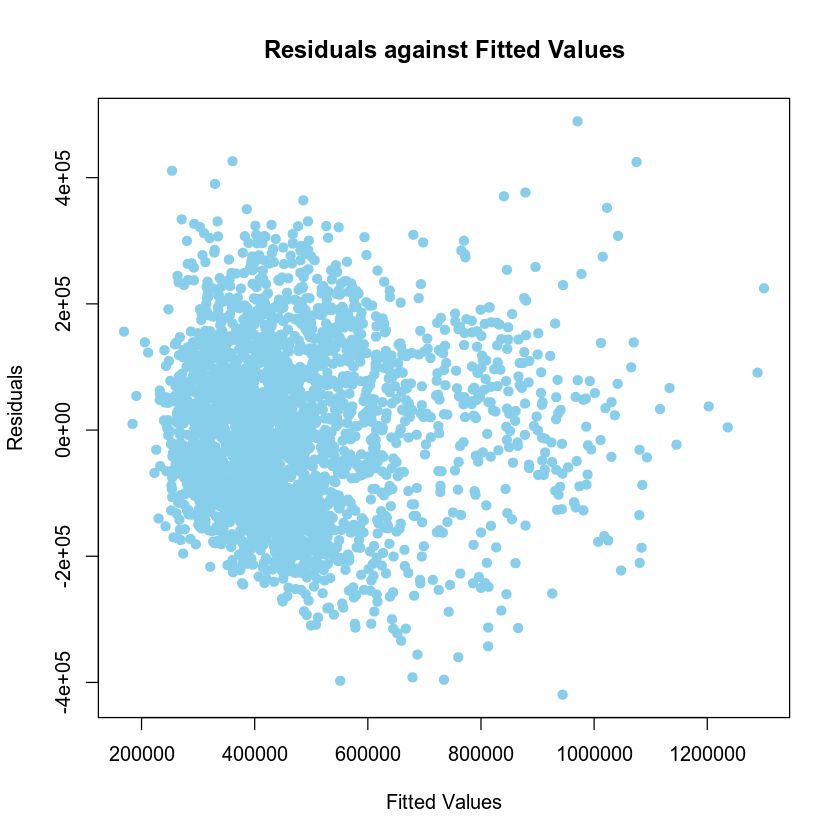

In [10]:
plot(fitted_values, residuals, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="skyblue", 
     pch = 19)

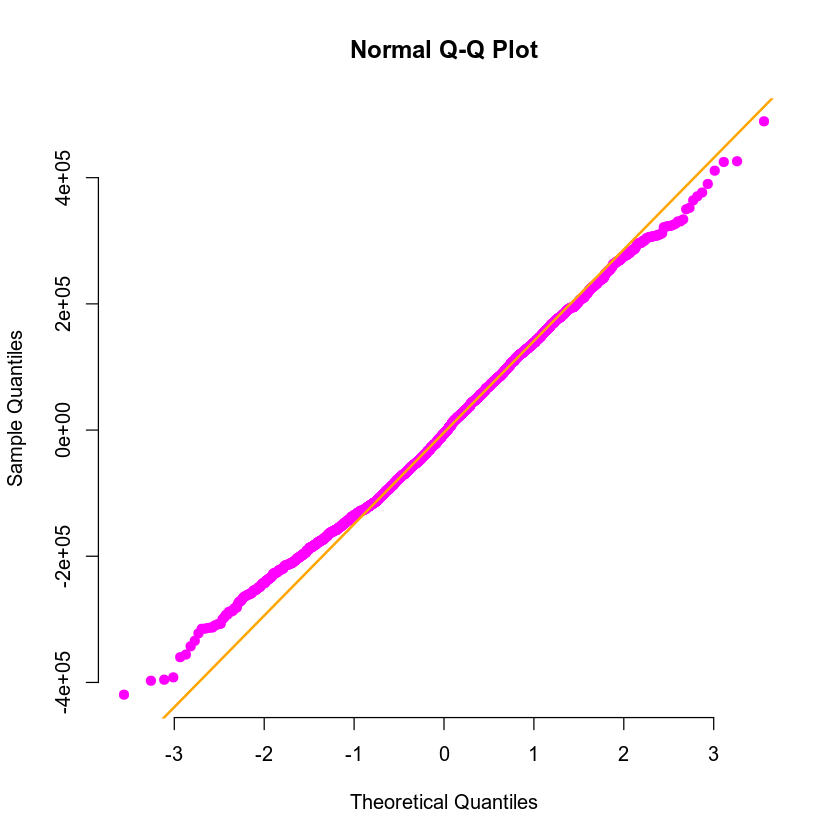

In [11]:
qqnorm(residuals, pch = 19, col="magenta", frame = FALSE)
qqline(residuals, col = "orange", lwd = 2)

In [12]:
# confidence intervals for model parameters
print("confint")
conf_95_int <- confint(model1, level=0.95) 
round(conf_95_int, 4)

[1] "confint"


,2.5 %,97.5 %
(Intercept),-19964.6636,35382.7600
sqft_living,113.3572,145.2120
sqft_above,4.8877,34.1364
age,1215.4948,1685.7382
bathrooms,31958.1373,55982.1122
view1,146492.7925,188490.2890
view2,225491.3633,272584.2403


In [13]:
newdata <- data.frame(sqft_living=2150, sqft_above=1050, age=15, bathrooms=3, view='0')

print("prediction interval")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
459828.2,239563,680093.4


[1] "confidence interval"


fit,lwr,upr
459828.2,446087.9,473568.5


In [14]:
newdata <- data.frame(sqft_living=4250, sqft_above=2100, age=5, bathrooms=5, view='2')

print("prediction interval")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
1074285,852522.6,1296048


[1] "confidence interval"


fit,lwr,upr
1074285,1045117,1103454


# Model #2 - Complete Second Order Regression Model with Quantitative Variables

You have been asked to create a complete second order regression model for *price* as the response variable, and *school_rating* and *crime* as predictor variables. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your complete second order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

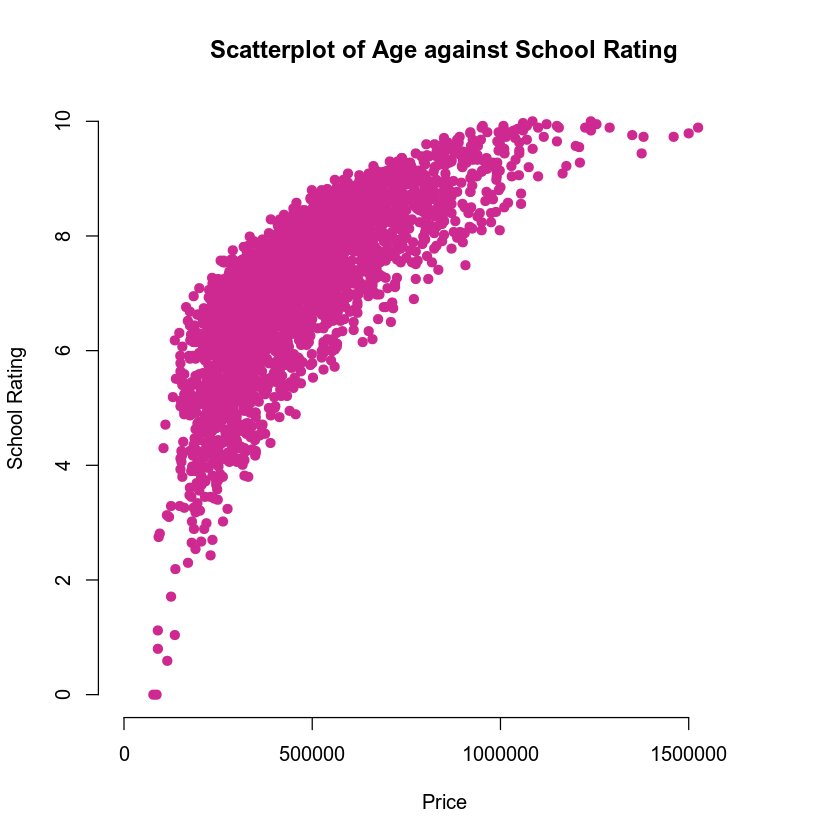

In [18]:
plot(housing_v2$price, housing_v2$school_rating, 
     main = "Scatterplot of Age against School Rating",
     xlab = "Price", ylab = "School Rating",
     xlim=c(0, 1700000),
     ylim=c(0, 10),
     col="maroon3", 
     pch = 19, frame = FALSE)

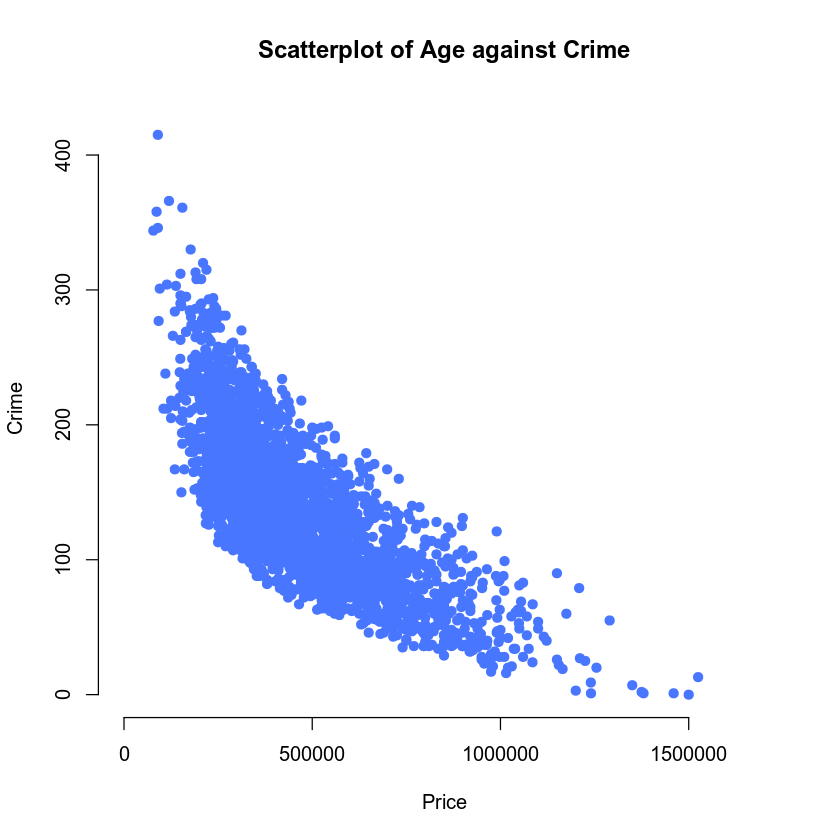

In [19]:
plot(housing_v2$price, housing_v2$crime, 
     main = "Scatterplot of Age against Crime",
     xlab = "Price", ylab = "Crime",
     xlim=c(0, 1700000),
     ylim=c(0, 425),
     col="royalblue1", 
     pch = 19, frame = FALSE)

In [15]:
# Create the second order model
model2 <- lm(price ~ school_rating + crime + school_rating:crime + I(school_rating^2) + I(crime^2), data=housing_v2)
summary(model2)


Call:
lm(formula = price ~ school_rating + crime + school_rating:crime + 
    I(school_rating^2) + I(crime^2), data = housing_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-340729  -61055   -6288   56875  427915 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.339e+05  1.032e+05   7.113 1.45e-12 ***
school_rating       -7.375e+04  2.083e+04  -3.541 0.000406 ***
crime               -3.155e+03  5.235e+02  -6.027 1.90e-09 ***
I(school_rating^2)   1.165e+04  1.109e+03  10.497  < 2e-16 ***
I(crime^2)           6.377e+00  7.265e-01   8.777  < 2e-16 ***
school_rating:crime -5.227e+01  4.853e+01  -1.077 0.281513    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 92690 on 2686 degrees of freedom
Multiple R-squared:  0.8088,	Adjusted R-squared:  0.8084 
F-statistic:  2272 on 5 and 2686 DF,  p-value: < 2.2e-16


In [21]:
fitted_values <- fitted.values(model2) 
fitted_values

1         2         3         4         5         6         7         8 
 316795.9  730990.2  570266.2  424500.0  620142.7  277655.2  312906.6  678714.4 
        9        10        11        12        13        14        15        16 
 218065.7  808695.1  317342.3  346740.5  413814.5  213959.6  373828.8  464594.2 
       17        18        19        20        21        22        23        24 
 650073.6  799564.0  430869.6  337281.8  399458.7  270157.5  470331.1  478713.5 
       25        26        27        28        29        30        31        32 
 788040.6  357305.0  581495.4  503722.7  847154.7  519288.1  181266.5  329802.5 
       33        34        35        36        37        38        39        40 
 693386.0  489733.1  456938.7  424043.1  474473.7  509998.9  591860.0  627197.4 
       41        42        43        44        45        46        47        48 
 718591.6  368813.5  227738.9  358966.3  330293.4  504987.3  355728.7  386202.9 
       49        50        51        52        53        54        55        56 
 332161.0  255795.3  454104.2  337164.1  244159.6  293094.6  376521.2  208149.4 
       57        58        59        60        61        62        63        64 
 416090.5  729493.9  784486.2  336857.2  406182.0  430847.5  644129.4  623984.3 
       65        66        67        68        69        70        71        72 
 517520.8  579565.2  398004.6  622198.5  812280.3  233067.0  379670.4  857971.6 
       73        74        75        76        77        78        79        80 
 467140.0  655862.9  340889.0  876489.7  392473.3  718463.2  654142.9  644160.7 
       81        82        83        84        85        86        87        88 
 416656.0  281929.6  351377.0  472463.7  696315.4  420823.1  519801.3  529703.0 
       89        90        91        92        93        94        95        96 
 403906.3  254469.5  285079.9  775015.6  217991.3  591961.0  464980.4  603828.4 
       97        98        99       100       101       102       103       104 
 546061.3  561780.1  665000.3  724418.7  244755.5  341518.5  485672.2  268423.5 
      105       106       107       108       109       110       111       112 
 274328.1  808967.9  598065.6  330946.3  500854.1  338620.7  550468.9  339063.9 
      113       114       115       116       117       118       119       120 
 398188.8  283326.2  703134.8  758527.1  461217.2  721403.9  368560.3  417950.5 
      121       122       123       124       125       126       127       128 
 657260.0  400355.7  189852.4  419831.8  273114.5  671936.1  290043.2  404552.1 
      129       130       131       132       133       134       135       136 
 647614.6  738605.6  218020.0  437906.3  994786.1  366428.6  560398.1  603342.8 
      137       138       139       140       141       142       143       144 
 417840.3  532098.7  536668.2  364899.0  303735.3  314672.6  371363.9  364413.5 
      145       146       147       148       149       150       151       152 
 438914.0  640710.0  395354.1  495638.2  362002.6  547157.2  358848.2  190876.8 
      153       154       155       156       157       158       159       160 
 744176.1  330218.8  507440.0  505687.9  339543.4  195669.5  213419.3  533604.5 
      161       162       163       164       165       166       167       168 
 316594.0  325290.8  542338.3  899176.5  268696.9  282116.8  544119.9  230508.1 
      169       170       171       172       173       174       175       176 
 594239.0  751423.0  473151.6  277002.7  568295.0  736207.5  538590.6  226276.8 
      177       178       179       180       181       182       183       184 
 592038.0  395421.0  357729.3  275836.2  215200.8  196690.3  344198.9  580994.7 
      185       186       187       188       189       190       191       192 
 502019.3  705737.9  669236.0  540306.2  494553.3  503824.5  274427.9  282041.0 
      193       194       195       196       197       198       199       200 
 237784.4  793632.2  401132.9  860246.7

In [22]:
residuals <- residuals(model2)
residuals

1             2             3             4             5 
   8204.12962   14009.75091     733.83156  -29499.96347 -170192.71508 
            6             7             8             9            10 
 -34655.20392  -92956.55880  120285.62929  -11065.71535  -58695.05744 
           11            12            13            14            15 
  32657.66727  -74740.46234  -28864.47242   58040.35767  -95828.76207 
           16            17            18            19            20 
  75405.81690  104926.40985  118436.02036  -19869.55595  -62281.80698 
           21            22            23            24            25 
  55541.29192   68842.54269  -25331.11404 -192763.51451    1959.36629 
           26            27            28            29            30 
 -47304.95695  -51545.42536 -164722.67312  -57154.71878   75711.94676 
           31            32            33            34            35 
  34733.48092  -54852.48436 -178386.01682   60266.91743  -86938.68745 
           36            37            38            39            40 
 -14043.10246   40526.27563  154951.13693   88140.02316 -143252.41763 
           41            42            43            44            45 
 126408.38519  161186.52409  102161.06628  300983.65262   14706.62695 
           46            47            48            49            50 
 145012.70300   59270.32692  -68202.90617  -88161.02524   -8295.33840 
           51            52            53            54            55 
 205895.81917  -77164.11459  -11659.61969  -23094.58733   13478.80498 
           56            57            58            59            60 
  56800.62700  -21090.49769 -121493.88893  -49486.23770  -56857.19041 
           61            62            63            64            65 
 -26182.01179   36252.47502  -26129.42554    1015.68464 -113020.80948 
           66            67            68            69            70 
-199065.20564  -23004.59208  -72198.48451   -2280.30416  146932.96892 
           71            72            73            74            75 
 -14670.35381  105028.44656  -57139.97451  -23112.92342   31111.03392 
           76            77            78            79            80 
-186489.72661   -9593.27892 -103463.16678  -46642.88535  -44160.71966 
           81            82            83            84            85 
 113343.98988   -7129.63142  -51377.04626  -77463.66057  133684.62650 
           86            87            88            89            90 
 -20823.11302  -17801.26299   12297.03365  -48906.26673  -17469.54927 
           91            92            93            94            95 
  24920.12859 -225015.57848   30508.72063   61038.98836 -120030.44067 
           96            97            98            99           100 
 226171.63221 -146061.34419   38219.93690   63999.70977  195581.31453 
          101           102           103           104           105 
 105244.53161  -52018.45944  -70672.18716  -38423.52080 -127328.10967 
          106           107           108           109           110 
  51032.12820  131934.40546  104053.68383  -25654.06381  -27620.66036 
          111           112           113           114           115 
 -10468.88089  -14063.93010 -109398.84138   20673.84288  -25634.76039 
          116           117           118           119           120 
 -38527.09840   88782.81917   28596.10557  -86560.28488  -22950.46085 
          121           122           123           124           125 
 -67310.04239  -95355.71615    5147.62470  130168.21768  -66014.48492 
          126           127           128           129           130 
-170936.13907  -54176.22317  -75552.09355 -112614.64403  115194.43452 
          131           132           133           134           135 
  -6020.02810  -48906.29061  -29786.13864  -41428.58543   18701.93713 
          136           137           138           139           140 
 -67342.79344   82159.72276  -22098.69004   93331.82603   25101.01143 
          141           142         

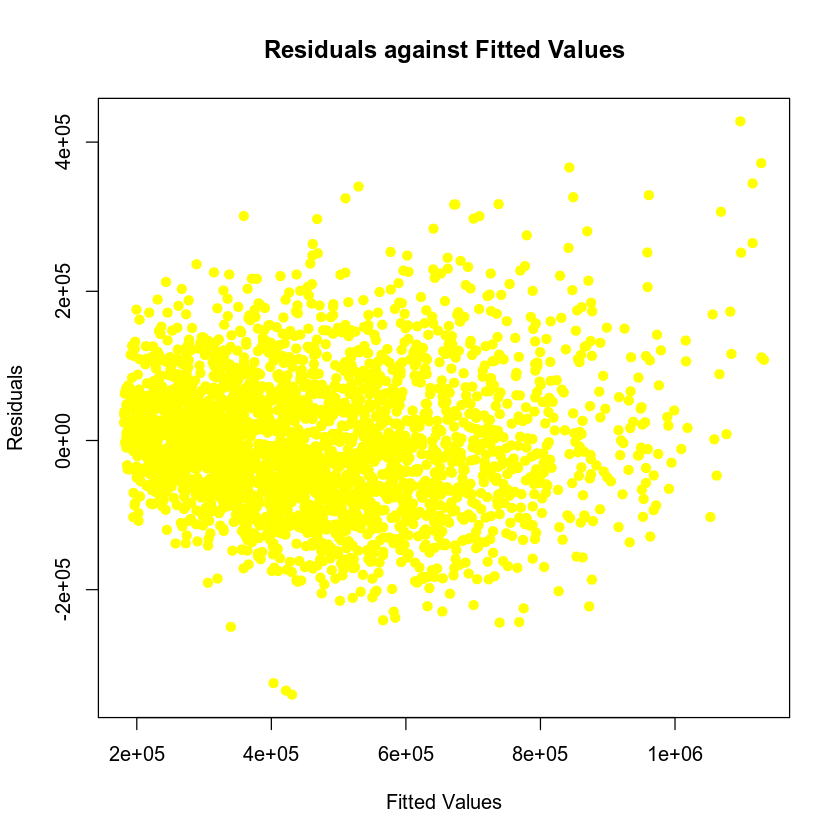

In [23]:
plot(fitted_values, residuals, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="yellow1", 
     pch = 19)

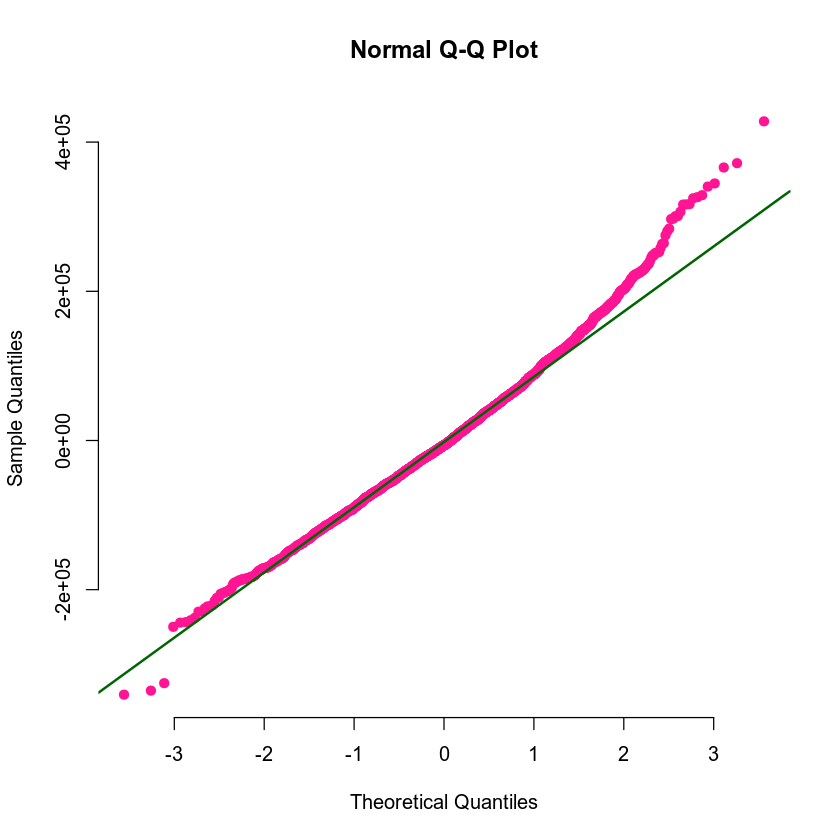

In [24]:
qqnorm(residuals, pch = 19, col="deeppink", frame = FALSE)
qqline(residuals, col = "darkgreen", lwd = 2)

In [25]:
newdata <- data.frame(school_rating=9.8, crime=81.02)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
874497,721606.2,1027388


[1] "confidence interval"


fit,lwr,upr
874497,863681.4,885312.7


In [26]:
newdata <- data.frame(school_rating=4.28, crime=215.50)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
199706.7,46991.65,352421.7


[1] "confidence interval"


fit,lwr,upr
199706.7,191753.5,207659.9


# Nested Models F-Test

You have been asked to create a reduced model and compare it with the complete second order model (Model #2 above). Before writing any code, review Section 5 of the Summary Report template to see the questions you will need to answer.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [28]:
# Create the first order regression model
model3 <- lm(price ~ school_rating + crime + school_rating:crime, data=housing_v2)
summary(model3)


Call:
lm(formula = price ~ school_rating + crime + school_rating:crime, 
    data = housing_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-336984  -63754   -4397   58894  440377 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -410233.37   25261.25  -16.24   <2e-16 ***
school_rating        155559.97    3133.06   49.65   <2e-16 ***
crime                  2230.07     129.70   17.20   <2e-16 ***
school_rating:crime    -564.85      17.86  -31.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 94870 on 2688 degrees of freedom
Multiple R-squared:  0.7995,	Adjusted R-squared:  0.7993 
F-statistic:  3573 on 3 and 2688 DF,  p-value: < 2.2e-16


In [30]:
# Create the complete model
fit_complete <- lm(price ~ school_rating + crime + school_rating:crime + I(school_rating^2) + I(crime^2), data=housing_v2)

# Create the reduced model
fit_reduced <- lm(price ~ school_rating + crime + school_rating:crime, data=housing_v2)

# Perform the F-test
anova(fit_complete, fit_reduced)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2686,2.307469e+13,NA,NA,NA,NA
2688,2.419501e+13,-2,-1.120319e+12,65.20513,2.22716e-28


## End of Project One Jupyter Notebook
The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in the Summary Report template for Project One, and to include your completed Jupyter Notebook scripts as part of your submission.